In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [32]:
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw

In [33]:
df = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/px4_odom_.csv')
# df = df[df['timestamp_us'] < 1e12]
# display(df)
df[['roll', 'pitch', 'yaw']] = df.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
df

,timestamp_us,px,py,pz,qw,qx,qy,qz,yaw_imu,yaw_slam,roll,pitch,yaw
0,1759315516861020,0.005045,-0.032853,0.000637,1.000000,0.000000,0.000000,0.000000e+00,0,0,0.000000,0.000000,0.000000
1,1759315516868949,0.005116,-0.033318,0.000646,1.000000,-0.000755,-0.000119,1.754590e-06,0,0,-0.001510,-0.000238,0.000004
2,1759315516876864,0.005188,-0.033780,0.000657,0.999999,-0.001557,0.000023,-3.314100e-06,0,0,-0.003114,0.000047,-0.000007
3,1759315516885032,0.005266,-0.034270,0.000666,1.000000,-0.000803,0.000255,-6.846720e-07,0,0,-0.001606,0.000510,-0.000002
4,1759315516892925,0.005337,-0.034734,0.000678,0.999999,-0.001543,-0.000072,-6.233160e-06,0,0,-0.003085,-0.000144,-0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,1759315576925585,-4.541580,10.324300,0.076290,0.873577,0.058840,0.198325,-4.405330e-01,0,0,-0.078507,0.409713,-0.950462
4517,1759315576933631,-4.492280,10.271500,0.128067,0.873593,0.059616,0.198379,-4.403710e-01,0,0,-0.077032,0.410547,-0.949877
4518,1759315576941606,-5.519430,11.364600,-0.938418,0.873580,0.058858,0.198297,-4.405360e-01,0,0,-0.078446,0.409678,-0.950450
4519,1759315576949621,-5.470330,11.312100,-0.886841,0.873671,0.059563,0.197976,-4.404040e-01,0,0,-0.076722,0.409767,-0.949769


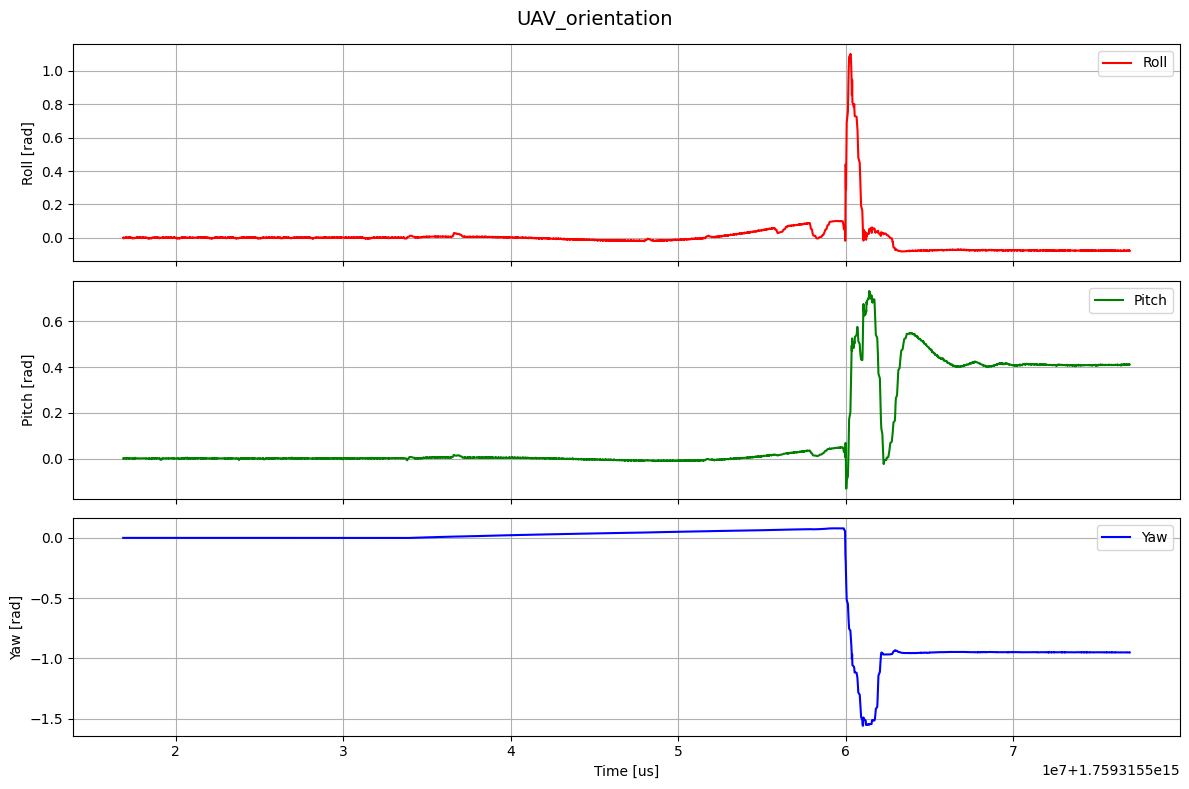

In [34]:
fig, (ax_roll, ax_pitch, ax_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_roll.plot(df['timestamp_us'], df['roll'], label='Roll', color='r')
ax_roll.set_ylabel("Roll [rad]")
ax_roll.grid(True)
ax_roll.legend()

# Pitch
ax_pitch.plot(df['timestamp_us'], df['pitch'], label='Pitch', color='g')
ax_pitch.set_ylabel("Pitch [rad]")
ax_pitch.grid(True)
ax_pitch.legend()

# Yaw
ax_yaw.plot(df['timestamp_us'], df['yaw'], label='Yaw', color='b')
ax_yaw.set_xlabel("Time [us]")
ax_yaw.set_ylabel("Yaw [rad]")
ax_yaw.grid(True)
ax_yaw.legend()

# タイトルを全体に
fig.suptitle("UAV_orientation", fontsize=14)

plt.tight_layout()
plt.show()

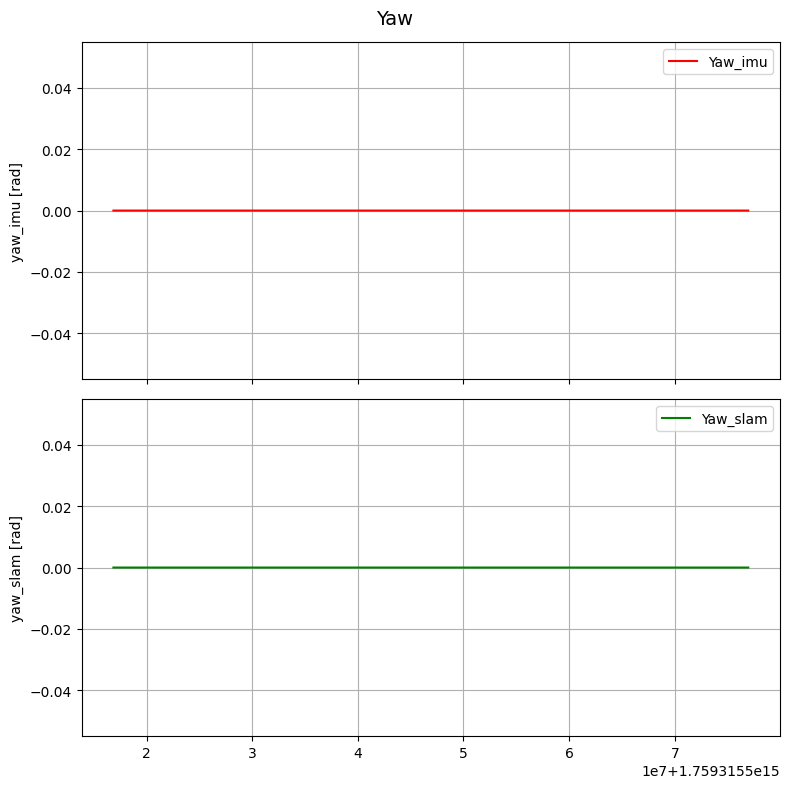

In [35]:
fig, (ax_imuy, imus) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax_imuy.plot(df['timestamp_us'], df['yaw_imu'], label='Yaw_imu', color='r')
ax_imuy.set_ylabel("yaw_imu [rad]")
ax_imuy.grid(True)
ax_imuy.legend()

imus.plot(df['timestamp_us'], df['yaw_slam'], label='Yaw_slam', color='g')
imus.set_ylabel("yaw_slam [rad]")
imus.grid(True)
imus.legend()

# タイトルを全体に
fig.suptitle("Yaw", fontsize=14)

plt.tight_layout()
plt.show()

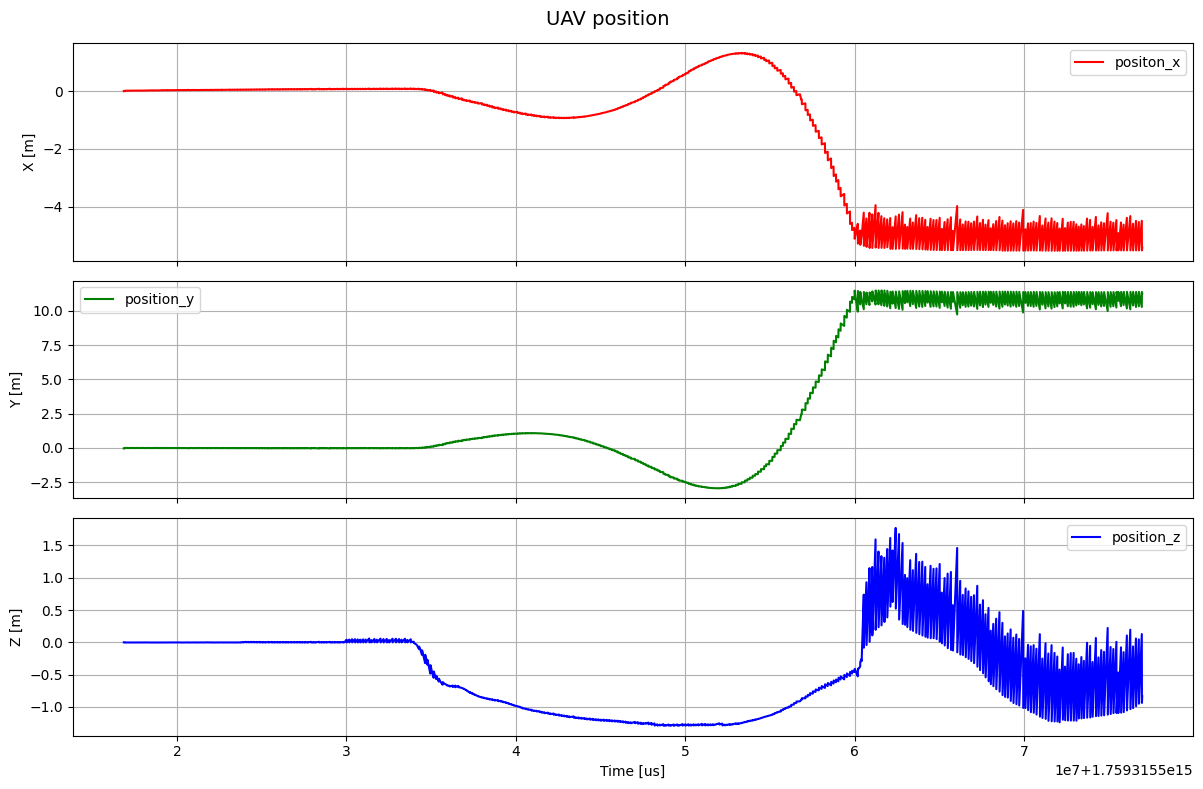

In [36]:
fig, (ax_px, ax_py, ax_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_px.plot(df['timestamp_us'], df['px'], label='positon_x', color='r')
ax_px.set_ylabel("X [m]")
ax_px.grid(True)
ax_px.legend()

# Pitch
ax_py.plot(df['timestamp_us'], df['py'], label='position_y', color='g')
ax_py.set_ylabel("Y [m]")
ax_py.grid(True)
ax_py.legend()
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw
# Yaw
ax_pz.plot(df['timestamp_us'], df['pz'], label='position_z', color='b')
ax_pz.set_xlabel("Time [us]")
ax_pz.set_ylabel("Z [m]")
ax_pz.grid(True)
ax_pz.legend()

# タイトルを全体に
fig.suptitle("UAV position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,1759137186174,0.062066,-0.033950,0.126088,0.718620,-0.006967,-0.008852,0.695312,-0.022326,-0.003034,1.537865
1,1759137186182,0.062087,-0.033968,0.126418,0.718626,-0.006963,-0.008842,0.695306,-0.022306,-0.003026,1.537847
2,1759137186190,0.062108,-0.033987,0.126772,0.718636,-0.006952,-0.008836,0.695296,-0.022281,-0.003032,1.537819
3,1759137186198,0.062131,-0.034008,0.127148,0.718634,-0.006948,-0.008840,0.695298,-0.022281,-0.003043,1.537825
4,1759137186206,0.062156,-0.034032,0.127549,0.718632,-0.006955,-0.008846,0.695300,-0.022299,-0.003043,1.537831
...,...,...,...,...,...,...,...,...,...,...,...
76017,1759138925093,127.030000,-315.616000,-17.635000,0.999919,-0.012698,-0.000417,-0.000513,-0.025396,-0.000847,-0.001016
76018,1759138925109,127.054000,-315.683000,-17.645200,0.999919,-0.012702,-0.000412,-0.000514,-0.025404,-0.000837,-0.001018
76019,1759138925117,127.067000,-315.717000,-17.650200,0.999919,-0.012698,-0.000415,-0.000515,-0.025397,-0.000843,-0.001020
76020,1759138925125,127.079000,-315.751000,-17.655300,0.999919,-0.012712,-0.000409,-0.000520,-0.025425,-0.000832,-0.001030


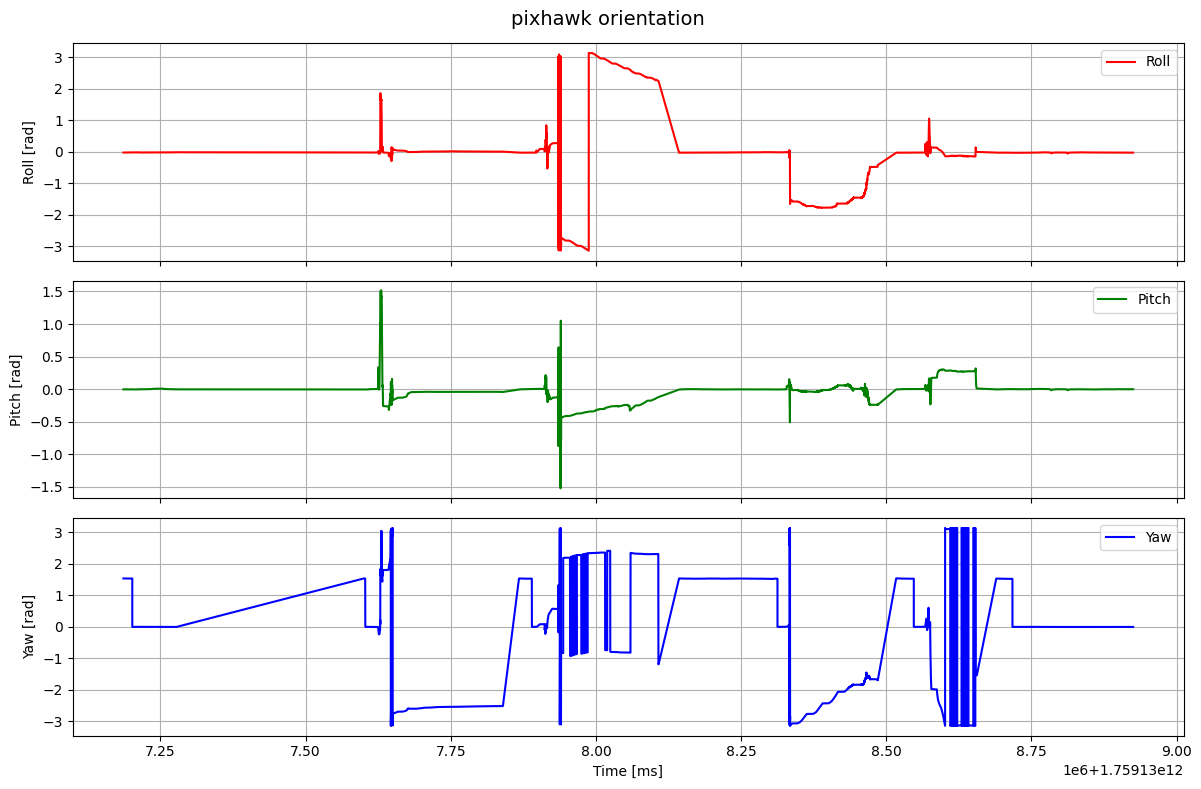

In [37]:
df2 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/pixhawk_odom.csv')
df2 = df2[df2['timestamp_us'] > 1e12]
df2[['roll', 'pitch', 'yaw']] = df2.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df2)
fig, (px_roll, px_pitch, px_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
px_roll.plot(df2['timestamp_us'], df2['roll'], label='Roll', color='r')
px_roll.set_ylabel("Roll [rad]")
px_roll.grid(True)
px_roll.legend()

# Pitch
px_pitch.plot(df2['timestamp_us'], df2['pitch'], label='Pitch', color='g')
px_pitch.set_ylabel("Pitch [rad]")
px_pitch.grid(True)
px_pitch.legend()

# Yaw
px_yaw.plot(df2['timestamp_us'], df2['yaw'], label='Yaw', color='b')
px_yaw.set_xlabel("Time [ms]")
px_yaw.set_ylabel("Yaw [rad]")
px_yaw.grid(True)
px_yaw.legend()

# タイトルを全体に
fig.suptitle("pixhawk orientation", fontsize=14)

plt.tight_layout()
plt.show()

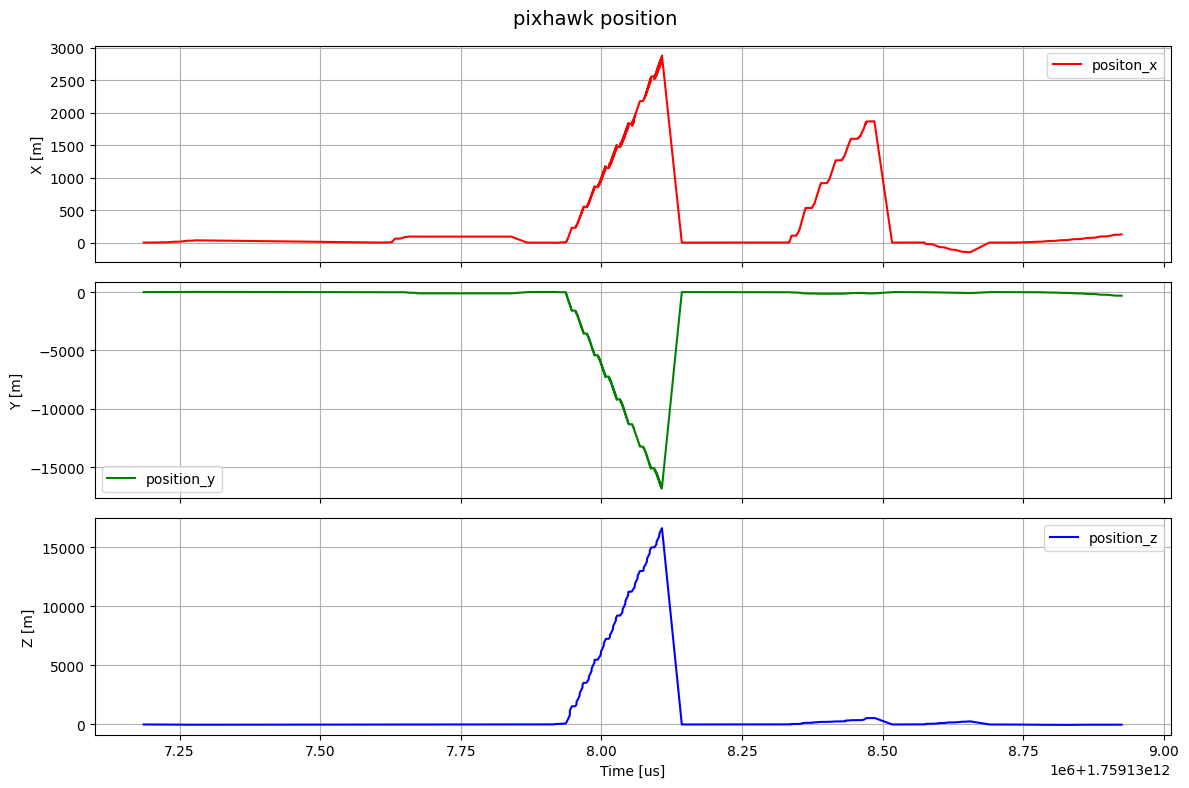

In [38]:
fig, (pix_px, pix_py, pix_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
pix_px.plot(df2['timestamp_us'], df2['px'], label='positon_x', color='r')
pix_px.set_ylabel("X [m]")
pix_px.grid(True)
pix_px.legend()

# Pitch
pix_py.plot(df2['timestamp_us'], df2['py'], label='position_y', color='g')
pix_py.set_ylabel("Y [m]")
pix_py.grid(True)
pix_py.legend()

# Yaw
pix_pz.plot(df2['timestamp_us'], df2['pz'], label='position_z', color='b')
pix_pz.set_xlabel("Time [us]")
pix_pz.set_ylabel("Z [m]")
pix_pz.grid(True)
pix_pz.legend()

# タイトルを全体に
fig.suptitle("pixhawk position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,1759315516913385,0.019431,-0.001923,0.002748,1.000000,-0.000178,0.000075,-0.000195,-0.000357,0.000151,-0.000389
1,1759315517040859,0.019914,-0.002110,0.002763,1.000000,-0.000183,-0.000019,-0.000273,-0.000366,-0.000038,-0.000547
2,1759315517251320,0.021323,-0.002172,0.002869,1.000000,-0.000419,-0.000074,-0.000059,-0.000837,-0.000148,-0.000118
3,1759315517400525,0.022131,-0.002142,0.002902,1.000000,-0.000414,-0.000140,-0.000177,-0.000828,-0.000281,-0.000354
4,1759315517591245,0.022772,-0.001849,0.002763,1.000000,-0.000551,0.000486,-0.000177,-0.001102,0.000972,-0.000354
...,...,...,...,...,...,...,...,...,...,...,...
357,1759315576258864,-5.568630,-11.424100,1.087230,0.892212,0.043846,-0.200842,0.402116,-0.090724,-0.404598,0.865484
358,1759315576418214,-5.568810,-11.422500,1.070290,0.892305,0.042535,-0.200700,0.402121,-0.093093,-0.403217,0.865835
359,1759315576595569,-5.568490,-11.423100,1.040780,0.892338,0.043015,-0.201141,0.401777,-0.092440,-0.404475,0.865094
360,1759315576765465,-5.567720,-11.422200,1.001470,0.892240,0.044536,-0.201102,0.401849,-0.089529,-0.405693,0.864769


,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
269,1759315561394067,-5.48947,-11.5242,-0.175459,0.68935,0.22433,-0.266721,0.635085,-0.038943,-0.711097,1.50336


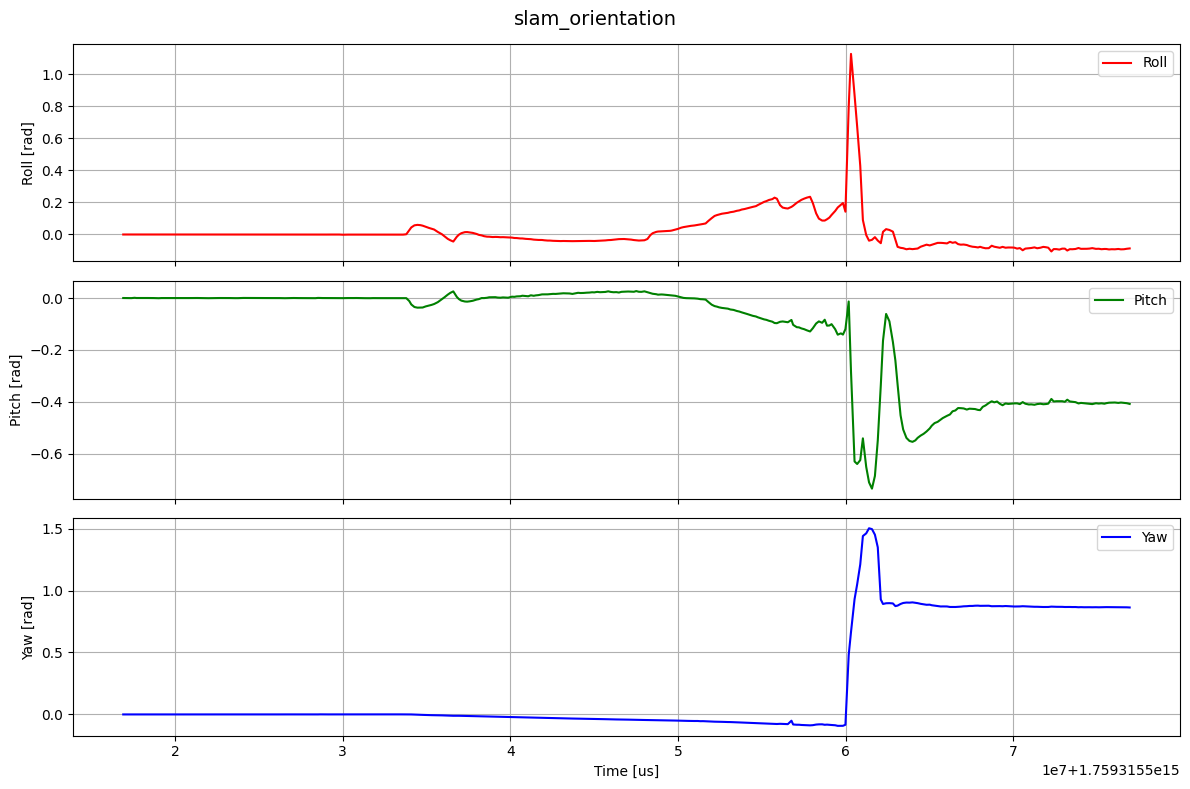

In [39]:
df3 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/slam_odom_.csv')
# df3 = df3[df3['timestamp_us'] > 1e12]
df3[['roll', 'pitch', 'yaw']] = df3.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df3)
display(df3[df3['yaw'] > 1.5])
fig, (sx_roll, sx_pitch, sx_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
sx_roll.plot(df3['timestamp_us'], df3['roll'], label='Roll', color='r')
sx_roll.set_ylabel("Roll [rad]")
sx_roll.grid(True)
sx_roll.legend()

# Pitch
sx_pitch.plot(df3['timestamp_us'], df3['pitch'], label='Pitch', color='g')
sx_pitch.set_ylabel("Pitch [rad]")
sx_pitch.grid(True)
sx_pitch.legend()

# Yaw
sx_yaw.plot(df3['timestamp_us'], df3['yaw'], label='Yaw', color='b')
sx_yaw.set_xlabel("Time [us]")
sx_yaw.set_ylabel("Yaw [rad]")
sx_yaw.grid(True)
sx_yaw.legend()

# タイトルを全体に
fig.suptitle("slam_orientation", fontsize=14)

plt.tight_layout()
plt.show()

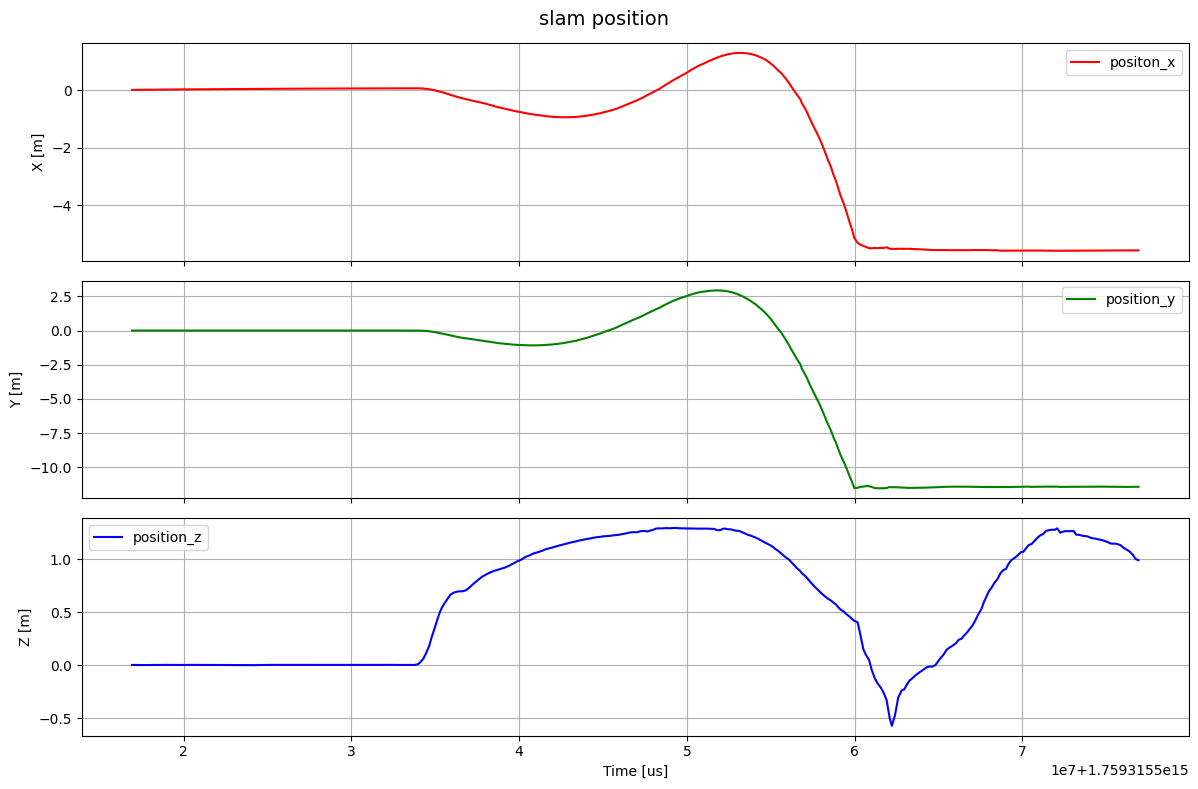

In [40]:
fig, (sx_px, sx_py, sx_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
sx_px.plot(df3['timestamp_us'], df3['px'], label='positon_x', color='r')
sx_px.set_ylabel("X [m]")
sx_px.grid(True)
sx_px.legend()

# Pitch
sx_py.plot(df3['timestamp_us'], df3['py'], label='position_y', color='g')
sx_py.set_ylabel("Y [m]")
sx_py.grid(True)
sx_py.legend()

# Yaw
sx_pz.plot(df3['timestamp_us'], df3['pz'], label='position_z', color='b')
sx_pz.set_xlabel("Time [us]")
sx_pz.set_ylabel("Z [m]")
sx_pz.grid(True)
sx_pz.legend()

# タイトルを全体に
fig.suptitle("slam position", fontsize=14)

plt.tight_layout()
plt.show()